In [1]:
import pandas as pd
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import glob
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# tf.debugging.set_log_device_placement(True)
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/00_Data_Science/09_rsna_atd/data.zip" -d "/content/09_rsna_atd"

Archive:  /content/drive/MyDrive/00_Data_Science/09_rsna_atd/data.zip
replace /content/09_rsna_atd/__MACOSX/data/._test_images? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
# data = '/content/drive/MyDrive/00_Data_Science/09_rsna_atd/data'
data = '/content/09_rsna_atd/data'

In [5]:
pic_paths = glob.glob(os.path.join(data, 'train_images', '*', '*', '*.png'))

In [6]:
df_data_label = pd.read_csv(os.path.join(data, 'train.csv'))

In [7]:
df_data_label

,patient_id,bowel_healthy,bowel_injury,extravasation_healthy,extravasation_injury,kidney_healthy,kidney_low,kidney_high,liver_healthy,liver_low,liver_high,spleen_healthy,spleen_low,spleen_high,any_injury,series_id,instance_number,injury_name,image_path,width,height
0,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,362,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
1,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,363,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
2,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,364,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
3,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,365,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
4,10004,1,0,0,1,0,1,0,1,0,0,0,0,1,1,21057,366,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13010,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,155,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
13011,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,156,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
13012,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,157,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512
13013,9632,1,0,0,1,1,0,0,1,0,0,1,0,0,1,3750,158,Active_Extravasation,/kaggle/input/rsna-2023-abdominal-trauma-detec...,512,512


In [ ]:
# df_data_label['image_path'][0]


In [8]:
# data = '/content/drive/MyDrive/00_Data_Science/09_rsna_atd/data'
pic_path = glob.glob(os.path.join(data, 'train_images', '*', '*', '*.png'))

df_data_label = pd.read_csv(os.path.join(data, 'train.csv'))
# df_data_label['image_path']= df_data_label['image_path'].str.replace("/kaggle/input/rsna-2023-abdominal-trauma-detection/",
#                                                                      '/content/drive/MyDrive/00_Data_Science/09_rsna_atd/data/')

df_data_label['image_path']= df_data_label['image_path'].str.replace("/kaggle/input/rsna-2023-abdominal-trauma-detection/",
                                                                     '/content/09_rsna_atd/data/')

df_data_label['image_path']= df_data_label['image_path'].str.replace(".dcm", '.png')

<ipython-input-8-e87f55abcb77>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df_data_label['image_path']= df_data_label['image_path'].str.replace(".dcm", '.png')


**Simple basic model, with 1 variable and a basic sequential model**

In [39]:
df_data = df_data_label[['bowel_injury', 'image_path', 'extravasation_injury']].drop_duplicates()
# df_data['bowel_injury']= df_data['bowel_injury'].astype(str)
# df_data['extravasation_injury']= df_data['extravasation_injury'].astype(str)

In [40]:
df_data.groupby('bowel_injury').count()

,image_path,extravasation_injury
bowel_injury,,
0,5759,5759
1,5777,5777


In [41]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_data, test_size=0.2, random_state=1)

In [42]:
df_train

,bowel_injury,image_path,extravasation_injury
7822,0,/content/09_rsna_atd/data/train_images/50833/7...,1
1072,1,/content/09_rsna_atd/data/train_images/12332/1...,0
5238,0,/content/09_rsna_atd/data/train_images/35842/1...,1
5209,1,/content/09_rsna_atd/data/train_images/35331/5...,0
8157,1,/content/09_rsna_atd/data/train_images/53395/4...,0
...,...,...,...
8311,1,/content/09_rsna_atd/data/train_images/53581/3...,0
12407,1,/content/09_rsna_atd/data/train_images/64194/2...,0
1016,0,/content/09_rsna_atd/data/train_images/12008/5...,1
5576,0,/content/09_rsna_atd/data/train_images/38541/6...,1


In [43]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   # validation_split=0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                  )
train_generator = train_datagen.flow_from_dataframe(
    dataframe = df_train,
    directory=None,
    x_col='image_path',
    y_col=['bowel_injury', 'extravasation_injury'],
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    # class_mode='binary',
    class_mode='multi_output',
    batch_size=32,
    shuffle=True,
    seed=1,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    # subset='training',
    interpolation='nearest',
    validate_filenames=True)

val_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe = df_test,
    directory=None,
    x_col='image_path',
    y_col=['bowel_injury', 'extravasation_injury'],
    weight_col=None,
    target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    # class_mode='binary',
    class_mode='multi_output',
    batch_size=32,
    shuffle=True,
    seed=1,
    save_to_dir=None,
    save_prefix='',
    save_format='png',
    # subset='validation',
    interpolation='nearest',
    validate_filenames=True)

Found 9228 validated image filenames.
Found 2308 validated image filenames.


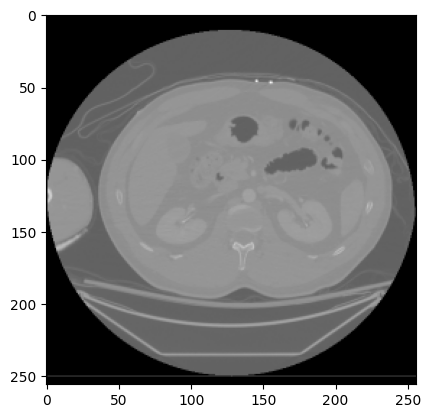

In [44]:
image = validation_generator.next()
plt.imshow(image[0][0])
plt.show()

**A1: Sequential Model**

In [45]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 30, 30, 64)       

In [23]:
from tensorflow.keras.optimizers.legacy import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])
#
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator)

**A2: use stacked model, multi-task**

In [46]:
from tensorflow.keras.optimizers.legacy import Adam
def build_model():
  inputs = tf.keras.Input(shape =(256,256,3))
  x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(inputs)
  x = tf.keras.layers.MaxPooling2D(2, 2)(x)
  # The second convolution
  x= tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  # The third convolution
  x= tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
  x= tf.keras.layers.MaxPooling2D(2,2)(x)
  # The fourth convolution
  x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  # The fifth convolution
  x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  # Flatten the results to feed into a DNN
  x = tf.keras.layers.Flatten()(x)
  # 512 neuron hidden layer
  x = tf.keras.layers.Dense(512, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  y_bowel = tf.keras.layers.Dense(1, activation='sigmoid', name='bowel')(x)
  y_extra = tf.keras.layers.Dense(1, activation='sigmoid', name='extra')(x)

  model = tf.keras.Model(inputs=inputs, outputs= [y_bowel, y_extra])

  # model.compile(loss='binary_crossentropy',
  #             optimizer=RMSprop(learning_rate=0.001),
  #             metrics=['accuracy'])

  model.compile(loss = {
        "bowel":tf.keras.losses.BinaryCrossentropy(),
        "extra":tf.keras.losses.BinaryCrossentropy(),
        # "liver":keras.losses.CategoricalCrossentropy(),
        # "kidney":keras.losses.CategoricalCrossentropy(),
        # "spleen":keras.losses.CategoricalCrossentropy(),
    },
    metrics = {
        "bowel":["accuracy"],
        "extra":["accuracy"],
    #     "liver":["accuracy"],
    #     "kidney":["accuracy"],
    #     "spleen":["accuracy"],
        },
                optimizer = Adam(learning_rate=0.0001),

                )

  return model

In [47]:
model_a2= build_model()

In [ ]:
history = model_a2.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator)

Epoch 1/15
289/289 [==============================] - 152s 522ms/step - loss: 1.3109 - bowel_loss: 0.6877 - extra_loss: 0.6232 - bowel_accuracy: 0.5422 - extra_accuracy: 0.6832 - val_loss: 1.2954 - val_bowel_loss: 0.6794 - val_extra_loss: 0.6160 - val_bowel_accuracy: 0.5589 - val_extra_accuracy: 0.6846
Epoch 2/15
289/289 [==============================] - 149s 516ms/step - loss: 1.2889 - bowel_loss: 0.6777 - extra_loss: 0.6112 - bowel_accuracy: 0.5776 - extra_accuracy: 0.6835 - val_loss: 1.2195 - val_bowel_loss: 0.6370 - val_extra_loss: 0.5825 - val_bowel_accuracy: 0.6456 - val_extra_accuracy: 0.6785
Epoch 3/15
289/289 [==============================] - 151s 523ms/step - loss: 1.2451 - bowel_loss: 0.6579 - extra_loss: 0.5872 - bowel_accuracy: 0.6064 - extra_accuracy: 0.6863 - val_loss: 1.1273 - val_bowel_loss: 0.6020 - val_extra_loss: 0.5253 - val_bowel_accuracy: 0.6824 - val_extra_accuracy: 0.7470
Epoch 4/15
289/289 [==============================] - 152s 525ms/step - loss: 1.1804 - b

In [ ]:
# model.evaluate(test_images, test_labels)
# classifications = model.predict(test_images)
# print(classifications[0])
# print(test_labels[0])

# the following is to generate the graph

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Inception Network: Transfer Learning

In [ ]:
import urllib.request
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

pre_trained_model = InceptionV3(input_shape=(256, 256, 3),
                                include_top=False,
                                weights=None)

pre_trained_model.load_weights(weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d_5[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalizati

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 14, 14, 768)


In [ ]:
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.3)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
model = Model(pre_trained_model.input, x)

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam
# with tf.device('/CPU:0'):
model.compile(loss='binary_crossentropy',
          # optimizer=RMSprop(learning_rate=0.001),  # 0.001 is the default optimizer
              optimizer = Adam(learning_rate=0.0001),
              metrics=['accuracy'])
#
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

Epoch 1/15
289/289 [==============================] - 160s 539ms/step - loss: 0.5314 - accuracy: 0.7406 - val_loss: 0.3209 - val_accuracy: 0.8627
Epoch 2/15
289/289 [==============================] - 154s 533ms/step - loss: 0.3918 - accuracy: 0.8246 - val_loss: 0.2714 - val_accuracy: 0.8843
Epoch 3/15
289/289 [==============================] - 156s 538ms/step - loss: 0.3458 - accuracy: 0.8503 - val_loss: 0.2365 - val_accuracy: 0.9099
Epoch 4/15
289/289 [==============================] - 153s 531ms/step - loss: 0.3273 - accuracy: 0.8546 - val_loss: 0.1917 - val_accuracy: 0.9233
Epoch 5/15
289/289 [==============================] - 153s 528ms/step - loss: 0.2948 - accuracy: 0.8703 - val_loss: 0.1752 - val_accuracy: 0.9307
Epoch 6/15
289/289 [==============================] - 151s 524ms/step - loss: 0.2750 - accuracy: 0.8817 - val_loss: 0.1816 - val_accuracy: 0.9359
Epoch 7/15
289/289 [==============================] - 153s 528ms/step - loss: 0.2653 - accuracy: 0.8851 - val_loss: 0.1992 -

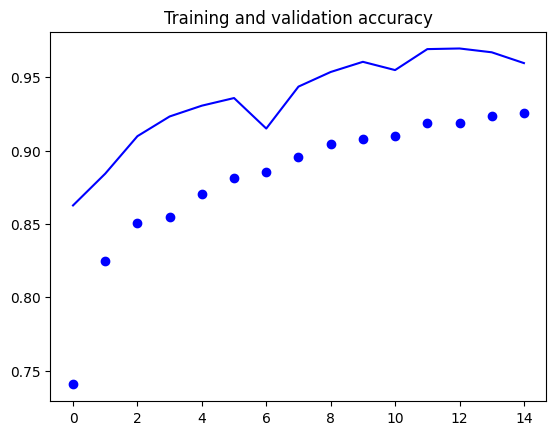

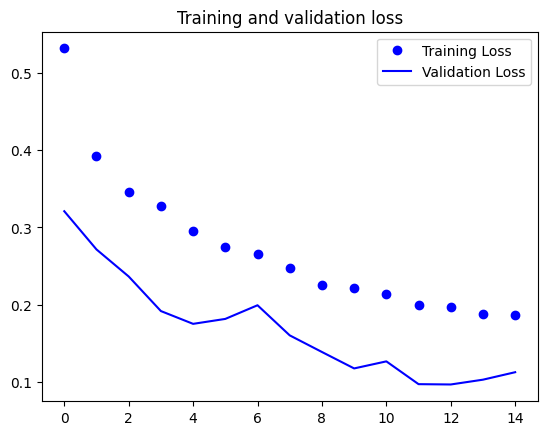

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()